### Stock Price Predictions with Machine Learning

In [ ]:
import numpy as np
import pandas as pd
import math 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
data=pd.read_csv("AAPL.csv")

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-02-2018,167.169998,168.619995,166.759995,167.779999,167.098724,47230800
1,02-02-2018,166.000000,166.800003,160.100006,160.500000,159.848282,86593800
2,05-02-2018,159.100006,163.880005,156.000000,156.490005,155.854568,72738500
3,06-02-2018,154.830002,163.720001,154.000000,163.029999,162.368011,68243800
4,07-02-2018,163.089996,163.399994,159.070007,159.539993,158.892166,51608600


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       31 non-null     object 
 1   Open       31 non-null     float64
 2   High       31 non-null     float64
 3   Low        31 non-null     float64
 4   Close      31 non-null     float64
 5   Adj Close  31 non-null     float64
 6   Volume     31 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.8+ KB


In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,31.000000,31.000000,31.000000,31.000000,31.000000,3.100000e+01
mean,171.336774,173.505806,169.662905,171.567420,171.441348,4.222235e+07
std,8.004007,7.208996,8.762506,7.967231,8.150006,1.573060e+07
min,154.830002,157.889999,150.240005,155.149994,154.520004,2.274380e+07
25%,164.544998,167.169998,162.264999,165.854996,165.719360,3.194435e+07
50%,172.830002,175.649994,172.449997,175.000000,175.000000,3.787690e+07
75%,178.230004,179.584999,176.800003,178.069999,178.069999,4.997460e+07
max,182.589996,183.500000,180.210007,181.720001,181.720001,8.659380e+07


In [6]:
df1=data.reset_index()['Close']

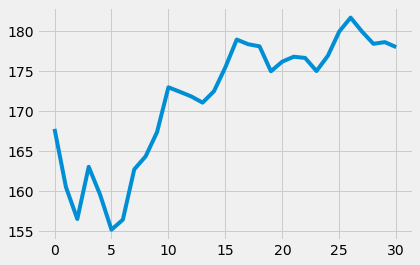

In [7]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [8]:
x = data['Date']
y = data['Close']

In [9]:
def df_plot(data, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(38,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

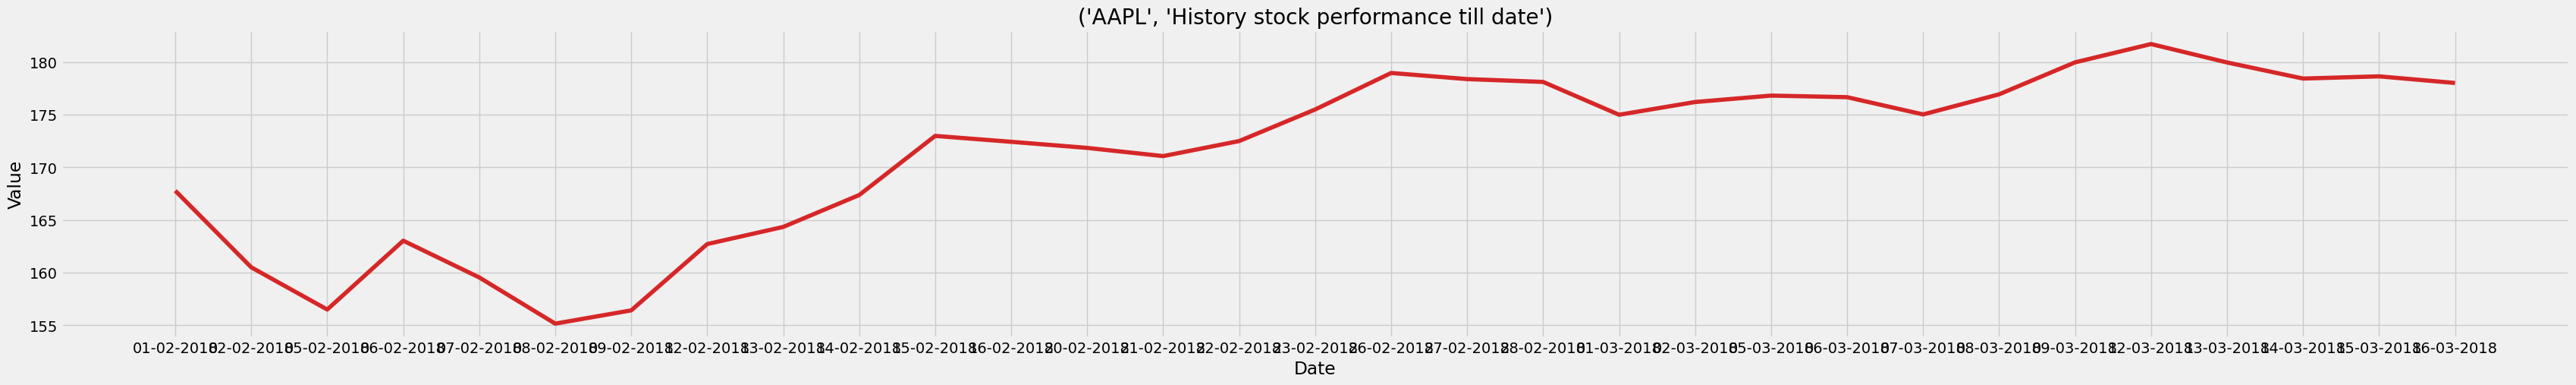

In [10]:
stock_name= "AAPL"
title = (stock_name,"History stock performance till date")

df_plot(data , x , y , title=title,xlabel='Date', ylabel='Value',dpi=100)

In [11]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [12]:
data['Date'] = pd.to_datetime(data.Date)

In [13]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,31.000000,31.000000,31.000000,31.000000,31.000000,3.100000e+01
mean,171.336774,173.505806,169.662905,171.567420,171.441348,4.222235e+07
std,8.004007,7.208996,8.762506,7.967231,8.150006,1.573060e+07
min,154.830002,157.889999,150.240005,155.149994,154.520004,2.274380e+07
25%,164.544998,167.169998,162.264999,165.854996,165.719360,3.194435e+07
50%,172.830002,175.649994,172.449997,175.000000,175.000000,3.787690e+07
75%,178.230004,179.584999,176.800003,178.069999,178.069999,4.997460e+07
max,182.589996,183.500000,180.210007,181.720001,181.720001,8.659380e+07


<AxesSubplot:>

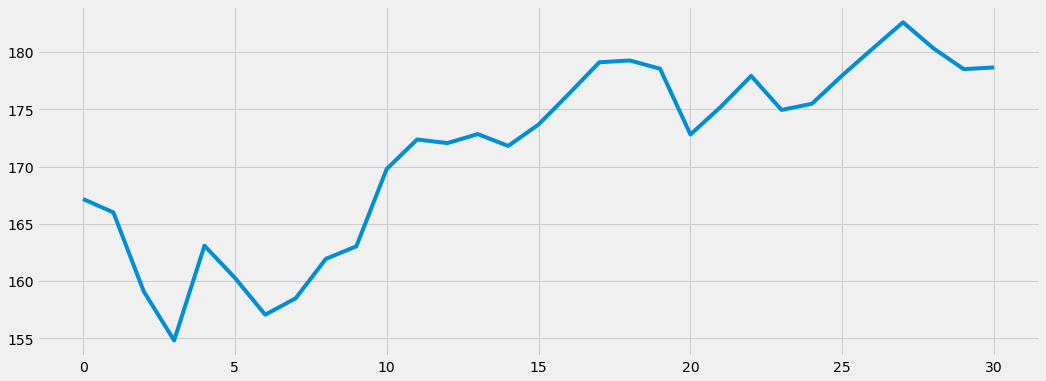

In [14]:
data['Open'].plot(figsize=(16,6))

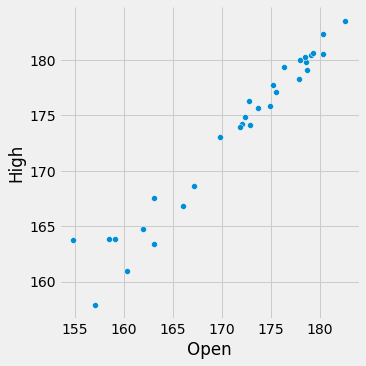

In [37]:
sns.relplot(x="Open", y="High", data=data, kind="scatter");

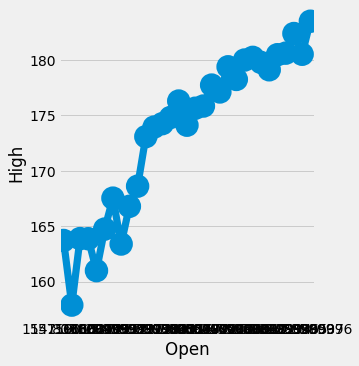

In [39]:
sns.catplot(x="Open", y="High", data=data, kind="point")

In [40]:
data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.976959,0.976744,0.932599,0.930755,-0.729789
High,0.976959,1.000000,0.982563,0.972058,0.969956,-0.727543
Low,0.976744,0.982563,1.000000,0.973101,0.971508,-0.803415
Close,0.932599,0.972058,0.973101,1.000000,0.999730,-0.788493
Adj Close,0.930755,0.969956,0.971508,0.999730,1.000000,-0.792311
Volume,-0.729789,-0.727543,-0.803415,-0.788493,-0.792311,1.000000


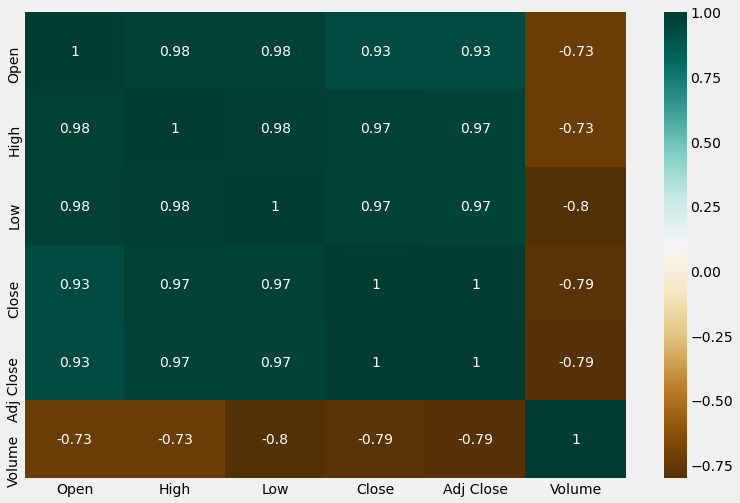

In [42]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),cmap='BrBG',annot=True)
plt.show()

In [15]:
X= data[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
y=data['Close']
         

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=0)

In [17]:
X_train.shape

(23, 5)

In [18]:
X_test.shape

(8, 5)

In [19]:
from sklearn import linear_model
from sklearn.metrics import confusion_matrix,accuracy_score

In [20]:
lm= linear_model.LinearRegression()

In [21]:
lm.fit(X_train,y_train)

LinearRegression()

In [22]:
print(lm.coef_)

[-7.86287672e-02  8.07359409e-02  9.42438318e-02  8.88725820e-01
  7.32862387e-09]


In [23]:
print(lm.intercept_)

2.3854184398295217


In [24]:
predict= lm.predict(X_test)

In [25]:
print(X_test)

          Open        High         Low   Adj Close    Volume
2   159.100006  163.880005  156.000000  155.854568  72738500
29  178.500000  180.240005  178.070007  178.649994  22743800
13  172.830002  174.119995  171.009995  171.070007  37471600
10  169.789993  173.089996  169.000000  172.990005  51147200
27  182.589996  183.500000  179.240005  179.970001  31693500
25  177.960007  180.000000  177.389999  179.979996  32185200
22  177.910004  178.250000  176.130005  176.669998  23788500
11  172.360001  174.820007  171.770004  172.429993  40176100


In [26]:
predict.shape

(8,)

In [27]:
dframe=pd.DataFrame(y_test,predict)

In [28]:
dfr= pd.DataFrame({'Actual Price':y_test,'Predicted Price':predict})

In [29]:
print(dfr)

    Actual Price  Predicted Price
2     156.490005       156.853677
29    178.649994       178.621573
13    171.070007       171.279335
10    172.990005       173.052355
27    179.970001       179.912159
25    179.979996       179.831768
22    176.669998       176.572448
11    172.429993       172.672908


In [30]:
lm.score(X_test,y_test)

0.999341560918679

In [31]:
import math

In [32]:
print("Mean absolute error",metrics.mean_absolute_error(y_test,predict))

Mean absolute error 0.15128821464445252


In [33]:
print("Mean squared error",metrics.mean_squared_error(y_test,predict))

Mean squared error 0.03432645235862834


In [34]:
print("Root Mean error",math.sqrt(metrics.mean_squared_error(y_test,predict)))

Root Mean error 0.18527399266661349


In [35]:
graph= dfr.head(30)

<AxesSubplot:>

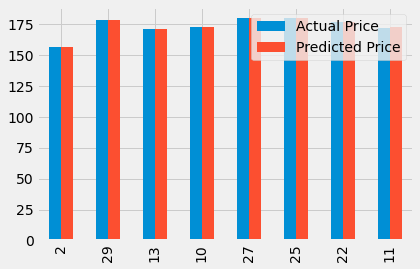

In [36]:
graph.plot(kind='bar')